Importing the Dependencies

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [21]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('car data.csv')

In [22]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [23]:
car_dataset['Owner'].unique()

array([0, 1, 3])

In [24]:
# checking the number of rows and columns
car_dataset.shape

(301, 9)

In [25]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [26]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [27]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding the Categorical Data

In [28]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

C:\Users\rajki\AppData\Local\Temp\ipykernel_21712\336345893.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
C:\Users\rajki\AppData\Local\Temp\ipykernel_21712\336345893.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
C:\Users\rajki\AppData\Local\Temp\ipykernel_21712\336345893.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a 

In [29]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data and Target

In [30]:
X = car_dataset.drop(['Car_Name','Year'],axis=1)
Y = car_dataset['Year']

In [31]:
print(X)

     Selling_Price  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  \
0             3.35           5.59       27000          0            0   
1             4.75           9.54       43000          1            0   
2             7.25           9.85        6900          0            0   
3             2.85           4.15        5200          0            0   
4             4.60           6.87       42450          1            0   
..             ...            ...         ...        ...          ...   
296           9.50          11.60       33988          1            0   
297           4.00           5.90       60000          0            0   
298           3.35          11.00       87934          0            0   
299          11.50          12.50        9000          1            0   
300           5.30           5.90        5464          0            0   

     Transmission  Owner  
0               0      0  
1               0      0  
2               0      0  
3              

In [32]:
print(Y)

0      2014
1      2013
2      2017
3      2011
4      2014
       ... 
296    2016
297    2015
298    2009
299    2017
300    2016
Name: Year, Length: 301, dtype: int64


Splitting Training and Test data

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [34]:
X_train.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
204,2.75,4.430,28282,0,0,0,0
249,5.25,7.600,17000,0,0,0,0
277,9.70,13.600,21780,0,0,0,0
194,0.20,0.787,50000,0,1,0,0
244,5.95,9.400,49000,1,0,0,0


Model Training

1. Linear Regression

In [35]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [36]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [37]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [38]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.4811185384306198


Visualize the actual prices and Predicted prices

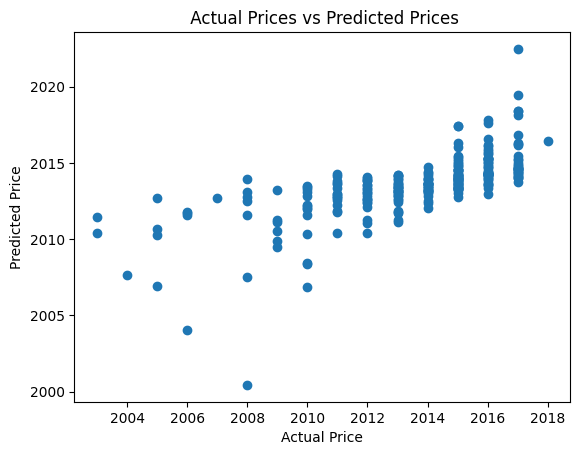

In [39]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [40]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [41]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("Accuracy : ", error_score)

Accuracy :  0.34021337863335366


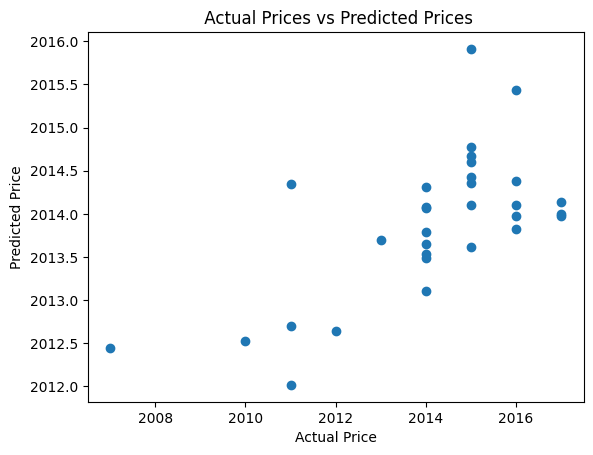

In [42]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

2. Lasso Regression

In [43]:
# loading the linear regression model
lass_reg_model = Lasso()

In [44]:
X_train.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
204,2.75,4.430,28282,0,0,0,0
249,5.25,7.600,17000,0,0,0,0
277,9.70,13.600,21780,0,0,0,0
194,0.20,0.787,50000,0,1,0,0
244,5.95,9.400,49000,1,0,0,0


In [45]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [46]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

training_data_prediction

array([2013.73043236, 2014.45009241, 2014.8443771 , 2012.69621114,
       2013.3508354 , 2015.02892718, 2014.79801711, 2014.44400582,
       2012.39241667, 2010.80253392, 2014.45335479, 2014.00509299,
       2013.38823576, 2011.95426445, 2015.4318869 , 2013.14209094,
       2013.54292456, 2016.92875709, 2013.09950702, 2013.4222876 ,
       2013.52979321, 2012.73588378, 2013.93491417, 2014.5299951 ,
       2011.8963467 , 2014.00379579, 2009.90514495, 2013.63182937,
       2012.59556529, 2013.75217675, 2015.38509449, 2013.85158367,
       2014.74322273, 2014.01537185, 2008.83437579, 2013.19380221,
       2014.00625283, 2013.37301163, 2014.31134691, 2013.68689846,
       2013.57695271, 2014.41622627, 2012.51609096, 2010.9665294 ,
       2013.48630853, 2014.36087653, 2014.50104926, 2015.01504271,
       2013.38669517, 2014.17394347, 2007.15482872, 2012.80212058,
       2014.73182682, 2013.40208646, 2012.92698618, 2013.9252843 ,
       2013.00843649, 2013.38329396, 2013.68613412, 2012.72636

In [47]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.4292336539974959


Visualize the actual prices and Predicted prices

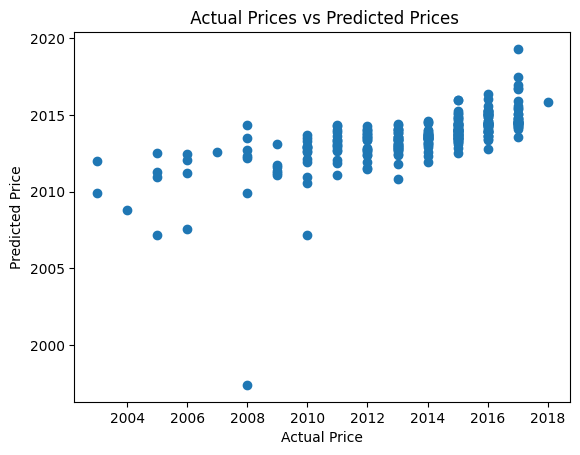

In [48]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [49]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)

In [50]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.2720142552618642


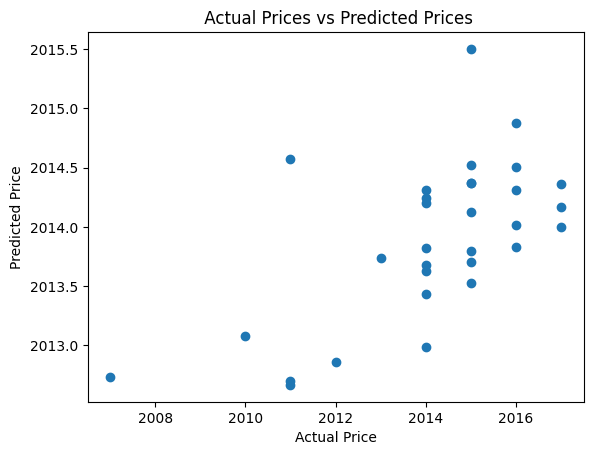

In [51]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [52]:
import pickle

pickle.dump(lass_reg_model,open('Year-model.pkl','wb'))

In [53]:
import pandas as pd
data={
    "Year": [2015],
    "Present_Price":[4.430],
    "Kms_Driven":[28282],
    "Fuel_Type":[0],
    "Seller_Type":[0],
    "Transmission":[0],
    "Owner":[0]
}
df=pd.DataFrame(data)

In [54]:
df

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2015,4.43,28282,0,0,0,0
